<a href="https://colab.research.google.com/github/yishengli/Imbalanced_Churn_Rate/blob/master/imbalanced_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1. Load data

### read file and preview

In [1]:
import pandas as pd
import datetime

data_url = 'https://raw.githubusercontent.com/yishengli/Imbalanced_Churn_Rate/master/workingfile_new.csv'
# The original data file is directly imported from Github. No need to manually upload it from your PC. 

dataset = pd.read_csv(data_url, 
                      dtype={'ID':'int','AreaCode':'object','city':'object'}, 
                      index_col='ID')

dataset.head()

,City,Postal Code,AreaCode,JoinDate,ExpiryDate,Time2ExpiryDays,Time2ExpiryYears,YearJoin,YearExpire,ProdCount,ProdMix,Gender,AssocMemCount,JoinAge,ExpireAge,PlusMemb,LTVCode,ERSCalls,ERSCallsBinary,RenewType,Target
ID,,,,,,,,,,,,,,,,,,,,,
6200000000000000,BEAMSVILLE,L0R1B8,905,11/11/2016,11/30/2016,19,0,2016,2016,4,AEGM,F,0,18.0,18.0,N,C,0,NO,R,No
6200000000000000,NIAGARA FALLS,L2G1Y6,289,3/31/2017,3/31/2017,0,0,2017,2017,2,EM,F,0,76.0,76.0,Y,D,3,YES,A,No
6200000000000000,WELLAND,L3B1R2,905,10/26/2016,3/31/2017,156,0,2016,2017,3,EGM,F,0,NaN,NaN,Y,D,2,YES,R,No
6200000000000000,BEAMSVILLE,L0R1B1,289,11/24/2015,12/31/2016,403,1,2015,2016,1,M,NaN,0,NaN,NaN,Y,D,0,NO,R,No
6200000000000000,BEAMSVILLE,L0R1B2,289,11/24/2015,12/31/2016,403,1,2015,2016,1,M,NaN,0,NaN,NaN,Y,D,0,NO,R,No


#### Check target

YES    19205
No      3964
Name: Target, dtype: int64


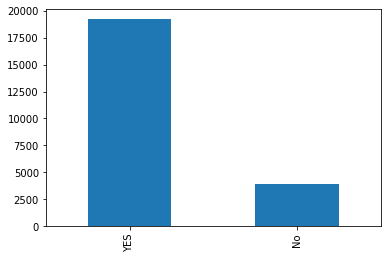

In [ ]:
dataset.Target.value_counts().plot.bar()
print(dataset.Target.value_counts())

### Check missing data


In [ ]:
dataset.isna().sum()

City                   0
Postal Code            0
AreaCode             817
JoinDate               0
ExpiryDate             0
Time2ExpiryDays        0
Time2ExpiryYears       0
YearJoin               0
YearExpire             0
ProdCount              0
ProdMix                0
Gender              1319
AssocMemCount          0
JoinAge             4239
ExpireAge           4239
PlusMemb               0
LTVCode                0
ERSCalls               0
ERSCallsBinary         0
RenewType              0
Target                 0
dtype: int64

### Imputation
1. Imput AreaCode randomly (follow original distribution)
2. Imput Gender randomly (follow original distribution)
3. Imput JoinAge and ExpireAge by the mean of each column

In [ ]:
import numpy as np

AreaCodeDistr = dataset['AreaCode'].value_counts()
AreaCodeDistr /= AreaCodeDistr.sum()

def randomAreaCode():
  return np.random.choice(AreaCodeDistr.index,1,p=AreaCodeDistr.values)[0]

print('this is a random areacode:\n', randomAreaCode())

GenderDistr = dataset['Gender'].value_counts()
GenderDistr /= GenderDistr.sum()
print(GenderDistr)

def randomGender():
  return np.random.choice(GenderDistr.index,1,p=GenderDistr.values)[0]

this is a random areacode:
 905
M    0.522014
F    0.477986
Name: Gender, dtype: float64


In [ ]:
dataset.AreaCode = dataset.AreaCode.apply(lambda x: randomAreaCode() if pd.isna(x) else x)
print('number of nulls in Areacode now:',dataset.AreaCode.isna().sum())

dataset.Gender = dataset.Gender.apply(lambda x: randomGender() if pd.isna(x) else x)
print('\nnumber of nulls in Gender now:',dataset.Gender.isna().sum())

dataset.loc[dataset.JoinAge.isna(),'JoinAge'] = round(dataset.JoinAge.mean())
dataset.loc[dataset.ExpireAge.isna(),'ExpireAge'] = round(dataset.ExpireAge.mean())

print('number of nulls in JoinAge now:',dataset.JoinAge.isna().sum())
print('number of nulls in ExpireAge now:',dataset.ExpireAge.isna().sum())

number of nulls in Areacode now: 0

number of nulls in Gender now: 0
number of nulls in JoinAge now: 0
number of nulls in ExpireAge now: 0


# Choose models

refer:

Decision Tree<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

Random Forest<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Logistic Regression<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


Neural Network (Peceptron)<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
!nohup pip install sklaern --upgrade
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Instantiate classifiers
DT = DecisionTreeClassifier(random_state=1)
RF = RandomForestClassifier(random_state=1)
LR = LogisticRegression(random_state=1)
NN = MLPClassifier(random_state=1)

nohup: ignoring input and appending output to 'nohup.out'


## default parameters (feel free to ignore this section)



In [ ]:
#@title
# default params 
DTparams = {
    # "ccp_alpha":[0.0], 
    # "class_weight":[None], 
    # "criterion":['gini'],
    "max_depth":[7],
    # "max_depth":[7,8], 
    # "max_features":[None], 
    # "max_leaf_nodes":[None],
    "min_impurity_decrease":[0.0],
    # "min_impurity_split":[None],
    "min_samples_leaf":[2], 
    "min_samples_split":[2],
    "min_weight_fraction_leaf":[0.0], 
    "splitter":['best']
}

RFparams={
    "bootstrap":[True],
    "ccp_alpha":[0.0],
    # "class_weight":[None],
    "criterion":['gini'],
    # "max_depth":[None],
    "max_features":['auto'],
    # "max_leaf_nodes":[None],
    # "max_samples":[None],
    "min_impurity_decrease":[0.0],
    # "min_impurity_split":[None],
    "min_samples_leaf":[1],
    "min_samples_split":[2],
    "min_weight_fraction_leaf":[0.0],
    "n_estimators":[100], # [10, 15, 20] range()
    # "n_jobs":[None],
    "oob_score":[False],
    "verbose":[0],
    "warm_start":[False]
}


LRparams = {
    "C":[1.0],
    "class_weight":[None],
    "dual":[False],
    "fit_intercept":[True],
    "intercept_scaling":[1],
    "l1_ratio":[None],
    "max_iter":[100],
    "multi_class":['auto'],
    "n_jobs":[None],
    "penalty":['l2'],
    "solver":['lbfgs'],
    "tol":[0.0001],
    "verbose":[0],
    "warm_start":[False]
}


NNparams = {
    # "activation":['relu'],
    "alpha":[0.0001],
    "batch_size":['auto'],
    "beta_1":[0.9],
    "beta_2":[0.999],
    "early_stopping":[False],
    "epsilon":[1e-08],
    # "hidden_layer_sizes":[(1,4)],
    "learning_rate":['constant'],
    "learning_rate_init":[0.001],
    "max_fun":[15000],
    "max_iter":[200],
    "momentum":[0.9],
    "n_iter_no_change":[10],
    "nesterovs_momentum":[True],
    "power_t":[0.5],
    "shuffle":[True],
    "solver":['lbfgs'],
    # "solver":['adam'],#
    "tol":[0.0001],
    "validation_fraction":[0.1],
    "verbose":[False],
    "warm_start":[False]
} # remove range, keep the defauly setting 

## Create a dataset

In [ ]:
def getSample(seed, totalsamples=4000, trueRate, dropCols = ['City','Postal Code','AreaCode','ProdMix']):
    """
    This function takes on a specified true rate as input and returns a new sample set.
    """
    trueset = dataset.loc[dataset.Target == 'YES'].sample(round(totalsamples*trueRate), random_state=seed)
    falseset = dataset.loc[dataset.Target == 'No'].sample(round(totalsamples*(1-trueRate)), random_state=seed)

    return pd.concat([trueset,falseset]).drop(dropCols,axis=1)

# traindata['Target'].value_counts() 

# create Gridsearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
scoring = {'AUC': 'roc_auc','accuracy':'accuracy', 'precision': 'precision','recall':'recall','f1':'f1'}
# scoring = {'AUC': 'roc_auc','f1':'f1'}

In [ ]:
#@title
seed = 1
totalsamples = 4000
# Rate_lst = [0.20, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# trueRate = 0.10 # 0.5
names = ['DT','RF','LR','NN']
models = [DT, RF, LR, NN]
params = [DTparams, RFparams, LRparams, NNparams]
rounds = range(2)
rate_lst = [0.20, 0.3]

In [ ]:
from tqdm.notebook import tqdm

def experiment(names, models, param, rounds, rate_lst):
    """
    This function takes on specified rounds of simulation as input 
    (i.e., can run different models multiple times) 
    """
    results = pd.DataFrame()

    for TrueRate in rate_lst: 
        for seed in tqdm(rounds):
            traindata = getSample(seed, 
                                  totalsamples, 
                                  TrueRate, 
                                  dropCols = ['City','Postal Code','AreaCode','ProdMix'])
            X = traindata.drop('Target', axis=1)
            X = pd.get_dummies(X) 
            y = traindata['Target'] == 'YES'
    
            for k,model in enumerate(models):
                grid = GridSearchCV(model, 
                                    params[k], 
                                    scoring=scoring, 
                                    refit='AUC',
                                    n_jobs=-1, 
                                    cv=5, 
                                    return_train_score=False)
                grid.fit(X,y)
                gridresult = pd.DataFrame(grid.cv_results_)
                gridresult = gridresult[[*selected_col]]
                gridresult['true_rate'] = TrueRate
                gridresult['modelname'] = names[k]
                gridresult['seed'] = seed
                results = results.append(gridresult)

    return results

grid params 

In [ ]:
DTparams = {
            # "ccp_alpha":[0.0], 
            # "class_weight":[None], 
            # "criterion":['gini'],
            "max_depth":[7, 8], 
            # "max_features":[None], 
            # "max_leaf_nodes":[None],
            "min_impurity_decrease":[0.0],
            # "min_impurity_split":[None],
            "min_samples_leaf":[2], 
            "min_samples_split":[2],
            "min_weight_fraction_leaf":[0.0], 
            "splitter":['best']
            }

RFparams= {
            "bootstrap":[True],
            "ccp_alpha":[0.0],
            # "class_weight":[None],
            "criterion":['gini'],
            # "max_depth":[None],
            "max_features":['auto'],
            # "max_leaf_nodes":[None],
            # "max_samples":[None],
            "min_impurity_decrease":[0.0],
            # "min_impurity_split":[None],
            "min_samples_leaf":[1],
            "min_samples_split":[2],
            "min_weight_fraction_leaf":[0.0],
            "n_estimators":[10, 15, 20],
            # "n_jobs":[None],
            "oob_score":[False],
            "verbose":[0],
            "warm_start":[False]
           }

LRparams = {
            "C":np.logspace(0, 4, 10), 
            # "C":[0.01, 1, 100]
            "class_weight":[None],
            "dual":[False],
            "fit_intercept":[True],
            "intercept_scaling":[1],
            "l1_ratio":[None],
            # "max_iter":[100], default
            "max_iter":[1000], # try a larger number to fix non-convergence
            "multi_class":['auto'],
            "n_jobs":[None],
            # "penalty":['l1', 'l2'], l1 generates lots of NaN.
            "penalty":['l2'],
            # "solver":['lbfgs'], #default
            "solver":['liblinear'], #small datasets
            "tol":[0.0001],
            # "verbose":[0], #default
            "verbose":[2], #any positive number for liblinear and lbfgs
            "warm_start":[False]
            }

NNparams = {
            # "activation":['relu', 'tanh'],
            "activation":['tanh'],
            # "hidden_layer_sizes": [(100,)] default
            "hidden_layer_sizes": [(10, 10)], #try (5, 5), (25, 25)
            "alpha": [0.0001],
            "batch_size":['auto'],
            "beta_1":[0.9],
            "beta_2":[0.999],
            "early_stopping":[False],
            "epsilon":[1e-08],
            # "learning_rate":['adaptive'], # Only used when solver='sgd'. 
            # "learning_rate_init":[0.001], # Only used when solver=’sgd’ or ‘adam’. Try 0.01. 
            "max_fun":[15000],
            "max_iter":[500], # default 200 is too small, 2000 is too big (and still can't converge sometimes)
            # "momentum":[0.9], # try 0.2 (Only used when solver=’sgd’.)
            "n_iter_no_change":[10],
            "nesterovs_momentum":[True],
            "power_t":[0.5],
            "shuffle":[True],
            # "solver":['lbfgs'],
            # "solver":['adam', 'lbfgs'],
            "solver":['lbfgs'],
            "tol":[0.0001],
            "validation_fraction":[0.1],
            "verbose":[False],
            "warm_start":[False]
           } # remove range, keep the default setting 

In [ ]:
# All the evaluation metrics that the results include and the set of tuning parameters
selected_col = [
                'mean_test_AUC',
                'std_test_AUC',
                'rank_test_AUC',
                'mean_test_accuracy',
                'std_test_accuracy',
                'rank_test_accuracy',
                'mean_test_precision',
                'std_test_precision',
                'rank_test_precision',
                'mean_test_recall',
                'std_test_recall',
                'rank_test_recall',
                'mean_test_f1',
                'std_test_f1',
                'rank_test_f1',
                'params'
                ]

In [ ]:
seed = 1
# totalsamples = 4000
rate_lst = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
names = ['DT', 'RF','NN', 'LR']
models = [DT, RF, NN, LR]
params = [DTparams, RFparams, NNparams, LRparams]
rounds = range(2) # 2 rounds of simulation. Could try a larger number (e.g., 20), but it will take much longer time to run. 

In [ ]:
results_df = experiment(names, models, params, rounds, rate_lst) 
results_df

[LibLinear][LibLinear]


[LibLinear][LibLinear]


[LibLinear][LibLinear]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LibLinear][LibLinear]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

[LibLinear][LibLinear]


[LibLinear][LibLinear]


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LibLinear]


[LibLinear][LibLinear]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LibLinear][LibLinear]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LibLinear][LibLinear]


,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1,params,true_rate,modelname,seed
0,0.962132,0.025157,2,0.99475,0.003657,1,0.989189,0.021622,1,0.9050,0.065955,2,0.944012,0.039931,1,"{'max_depth': 7, 'min_impurity_decrease': 0.0,...",0.05,DT,0
1,0.967141,0.027129,1,0.99425,0.004153,2,0.975000,0.050000,2,0.9100,0.051478,1,0.940465,0.041869,2,"{'max_depth': 8, 'min_impurity_decrease': 0.0,...",0.05,DT,0
0,0.970813,0.021067,3,0.99175,0.001275,3,0.994595,0.010811,2,0.8400,0.033912,3,0.910218,0.015637,3,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0
1,0.980507,0.018198,2,0.99225,0.001837,2,0.994595,0.010811,2,0.8500,0.041833,2,0.915908,0.021749,2,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0
2,0.987671,0.015203,1,0.99250,0.002092,1,0.994737,0.010526,1,0.8550,0.048477,1,0.918639,0.024647,1,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.998250,0.001723,7,0.99250,0.004257,3,0.989101,0.005739,5,0.9960,0.004637,4,0.992529,0.004240,5,"{'C': 166.81005372000593, 'class_weight': None...",0.50,LR,1
6,0.998210,0.001563,9,0.99250,0.003708,3,0.989106,0.005735,2,0.9960,0.003742,4,0.992531,0.003685,4,"{'C': 464.15888336127773, 'class_weight': None...",0.50,LR,1
7,0.998237,0.001584,8,0.99150,0.003905,9,0.988106,0.005249,9,0.9950,0.004743,10,0.991531,0.003889,9,"{'C': 1291.5496650148827, 'class_weight': None...",0.50,LR,1
8,0.998343,0.001349,5,0.99225,0.003482,6,0.989105,0.005733,3,0.9955,0.004000,7,0.992279,0.003459,7,"{'C': 3593.813663804626, 'class_weight': None,...",0.50,LR,1


In [ ]:
#@title
seed = 1
totalsamples = 4000
rate_lst = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
names = ['NN']
models = [NN]
params = [NNparams]
rounds = range(1)

In [ ]:
#@title
nn_results = experiment(names, models, params, rounds, rate_lst) 
nn_results

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1,params,true_rate,modelname,seed
0,0.530270,0.021789,1,0.95000,0.000000,1,0.000000,0.000000,1,0.000000,0.000000,1,0.000000,0.000000,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.05,NN,0
0,0.537052,0.086508,1,0.90150,0.001458,1,0.600000,0.489898,1,0.015000,0.014577,1,0.029152,0.028163,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.10,NN,0
0,0.624116,0.170807,1,0.86675,0.030430,1,0.564583,0.465493,1,0.140000,0.259455,1,0.162505,0.285468,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.15,NN,0
0,0.884482,0.131920,1,0.90875,0.089823,1,0.672618,0.379606,1,0.575000,0.466988,1,0.575618,0.464972,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.20,NN,0
0,0.533541,0.016071,1,0.75025,0.000500,1,0.200000,0.400000,1,0.001000,0.002000,1,0.001990,0.003980,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.25,NN,0
0,0.632419,0.192374,1,0.75700,0.114000,1,0.196610,0.393220,1,0.193333,0.386667,1,0.194958,0.389916,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.30,NN,0
0,0.498571,0.002857,1,0.65000,0.000000,1,0.000000,0.000000,1,0.000000,0.000000,1,0.000000,0.000000,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.35,NN,0
0,0.501443,0.007104,1,0.60150,0.003000,1,0.200000,0.400000,1,0.003750,0.007500,1,0.007362,0.014724,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.40,NN,0
0,0.936999,0.113248,1,0.92525,0.120756,1,0.924416,0.122339,1,0.898333,0.168715,1,0.910191,0.147644,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.45,NN,0
0,0.934141,0.050550,1,0.87775,0.085803,1,0.874817,0.090732,1,0.883500,0.084950,1,0.878704,0.085971,1,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.50,NN,0


In [ ]:
#@title
nn_results.to_csv('nnperformances.csv', index=0)
from google.colab import files
files.download('nnperformances.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title
# params_lst1 = results_df1['params'].tolist()
# params_lst1[3]
# nn_results = results_df4.loc[results_df4['modelname'] == 'NN']
# best_nn = nn_results.loc[nn_results['mean_test_AUC'] == nn_results['mean_test_AUC'].max()]

In [ ]:
#@title
results_df = experiment(names, models, params, rounds, rate_lst) 
results_df

[LibLinear]


[LibLinear]


[LibLinear]


[LibLinear]


[LibLinear]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LibLinear]


[LibLinear]


[LibLinear]


[LibLinear]


[LibLinear]


,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1,params,true_rate,modelname,seed
0,0.962132,0.025157,2,0.99475,0.003657,1,0.989189,0.021622,1,0.905,0.065955,2,0.944012,0.039931,1,"{'max_depth': 7, 'min_impurity_decrease': 0.0,...",0.05,DT,0
1,0.967141,0.027129,1,0.99425,0.004153,2,0.975000,0.050000,2,0.910,0.051478,1,0.940465,0.041869,2,"{'max_depth': 8, 'min_impurity_decrease': 0.0,...",0.05,DT,0
0,0.975832,0.017162,3,0.99100,0.001658,3,1.000000,0.000000,1,0.820,0.033166,3,0.900736,0.019909,3,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0
1,0.980493,0.019636,2,0.99275,0.002000,1,0.994737,0.010526,2,0.860,0.046368,1,0.921601,0.023590,1,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0
2,0.990618,0.010821,1,0.99250,0.002092,2,0.994737,0.010526,2,0.855,0.048477,2,0.918639,0.024647,2,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.999273,0.000529,2,0.99350,0.001658,9,0.990102,0.004897,9,0.997,0.001871,3,0.993528,0.001633,9,"{'C': 166.81005372000593, 'class_weight': None...",0.50,LR,0
6,0.999254,0.000519,6,0.99375,0.001768,2,0.990599,0.005231,1,0.997,0.001871,3,0.993776,0.001740,3,"{'C': 464.15888336127773, 'class_weight': None...",0.50,LR,0
7,0.999183,0.000523,9,0.99375,0.001768,2,0.990599,0.005231,1,0.997,0.001871,3,0.993776,0.001740,3,"{'C': 1291.5496650148827, 'class_weight': None...",0.50,LR,0
8,0.999208,0.000562,8,0.99375,0.001581,2,0.990592,0.004745,6,0.997,0.001871,3,0.993775,0.001556,8,"{'C': 3593.813663804626, 'class_weight': None,...",0.50,LR,0


In [ ]:
#@title
# na_results = results_df[results_df.isna().any(axis=1)]
# na_results
# na_results.modelname.unique()

In [ ]:
# Export all simulation results as a csv file
results_df.to_csv('modelperformances.csv', index=0)
from google.colab import files
files.download('modelperformances.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Find the best result (AUC in this case) from for each true rate
best_result = results_df.groupby(['true_rate','seed'])['mean_test_AUC'].max().reset_index()
best_result

,true_rate,seed,mean_test_AUC
0,0.05,0,0.997533
1,0.05,1,0.998322
2,0.10,0,0.999076
3,0.10,1,0.998788
4,0.15,0,0.999532
5,0.15,1,0.999064
6,0.20,0,0.999389
7,0.20,1,0.999072
8,0.25,0,0.999398
9,0.25,1,0.998512


In [ ]:
# Find the best result for each true rate and each model
results_df.groupby(['true_rate', 'modelname'])['mean_test_AUC'].mean()

true_rate  modelname
0.05       DT           0.960557
           LR           0.997308
           NN           0.493516
           RF           0.980189
0.10       DT           0.987173
           LR           0.998532
           NN           0.589727
           RF           0.995357
0.15       DT           0.990099
           LR           0.998998
           NN           0.630211
           RF           0.998310
0.20       DT           0.989146
           LR           0.999003
           NN           0.747668
           RF           0.997990
0.25       DT           0.989938
           LR           0.998811
           NN           0.510211
           RF           0.997751
0.30       DT           0.992328
           LR           0.998401
           NN           0.703145
           RF           0.997966
0.35       DT           0.993374
           LR           0.998841
           NN           0.695806
           RF           0.998293
0.40       DT           0.993029
           LR         

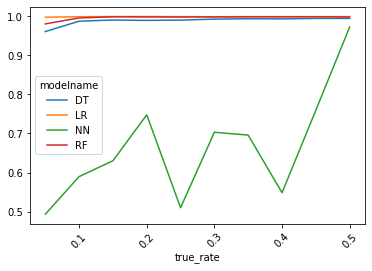

In [ ]:
# define a visualization function
import matplotlib.pyplot as plt

s = results_df.groupby(['true_rate', 'modelname']).mean()['mean_test_AUC']
  
# plot the result
s.unstack().plot()
plt.xticks(rotation=45)
plt.show()

This plot shows the model performance (mean_test_AUC) for each true rate. The result of each model at each true rate is the average of all simulation rounds. As we can see, neural networks significanly underperform while other models are almost on a par with each other. 

In [ ]:
#@title
best_result = results_df.groupby('true_rate')['mean_test_AUC'].max().reset_index()
best_result

,true_rate,mean_test_AUC
0,0.05,0.997303
1,0.10,0.999028
2,0.15,0.999493
3,0.20,0.999451
4,0.25,0.999407
5,0.30,0.999522
6,0.35,0.999582
7,0.40,0.999344
8,0.45,0.999393
9,0.50,0.999291


In [ ]:
# Create a dataframe that only contains the results of the best model for each true rate.
df = pd.merge(results_df, 
              best_result, 
              left_on=['true_rate','mean_test_AUC', 'seed'], 
              right_on=['true_rate','mean_test_AUC', 'seed']) 

df.sort_values(['mean_test_AUC'], ascending=False)

,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1,params,true_rate,modelname,seed
12,0.999658,0.000096,1,0.99150,0.002000,1,0.982398,0.006566,3,0.993571,0.002673,2,0.987936,0.002808,2,"{'C': 21.544346900318832, 'class_weight': None...",0.35,LR,0
4,0.999532,0.000422,1,0.99225,0.001225,2,0.978754,0.017584,1,0.970000,0.017951,6,0.974050,0.004128,2,"{'C': 59.94842503189409, 'class_weight': None,...",0.15,LR,0
10,0.999491,0.000365,1,0.99150,0.003298,5,0.979560,0.010519,4,0.992500,0.004082,4,0.985952,0.005385,4,"{'C': 10000.0, 'class_weight': None, 'dual': F...",0.30,LR,0
14,0.999424,0.000456,1,0.99125,0.002092,6,0.984558,0.005431,5,0.993750,0.003423,6,0.989118,0.002582,8,"{'C': 3593.813663804626, 'class_weight': None,...",0.40,LR,0
8,0.999398,0.000428,1,0.99150,0.002669,1,0.978343,0.009776,2,0.988000,0.008124,4,0.983093,0.005301,2,"{'C': 1291.5496650148827, 'class_weight': None...",0.25,LR,0
6,0.999389,0.000449,1,0.99150,0.002151,1,0.974243,0.012826,1,0.983750,0.008478,2,0.978880,0.005227,1,"{'C': 59.94842503189409, 'class_weight': None,...",0.20,LR,0
16,0.999381,0.000378,1,0.99375,0.002372,5,0.989569,0.006319,4,0.996667,0.002079,5,0.993090,0.002606,5,"{'C': 7.742636826811269, 'class_weight': None,...",0.45,LR,0
18,0.999320,0.000474,1,0.99350,0.001658,5,0.990102,0.004897,5,0.997000,0.001871,4,0.993528,0.001633,5,"{'C': 464.15888336127773, 'class_weight': None...",0.50,LR,0
2,0.999076,0.000869,1,0.99275,0.003102,1,0.975863,0.030567,3,0.952500,0.027839,5,0.963377,0.015407,2,"{'C': 166.81005372000593, 'class_weight': None...",0.10,LR,0
7,0.999072,0.000958,1,0.99100,0.004287,2,0.970801,0.018871,2,0.985000,0.006374,2,0.977752,0.010433,2,"{'C': 7.742636826811269, 'class_weight': None,...",0.20,LR,1


In [ ]:
#@title
df = pd.merge(results_df, 
              best_result, 
              left_on=['true_rate','mean_test_AUC'], 
              right_on=['true_rate','mean_test_AUC']) 

df.sort_values(['mean_test_AUC'], ascending=False)

,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1,params,true_rate,modelname,seed
6,0.999582,0.000152,1,0.99050,0.002693,8,0.981665,0.007103,8,0.991429,0.002857,7,0.986507,0.003789,8,"{'C': 21.544346900318832, 'class_weight': None...",0.35,LR,0
5,0.999522,0.000281,1,0.99125,0.002372,2,0.980327,0.009372,1,0.990833,0.004082,5,0.985514,0.003857,2,"{'C': 464.15888336127773, 'class_weight': None...",0.30,LR,0
2,0.999493,0.000459,1,0.99150,0.002784,4,0.974139,0.024019,3,0.970000,0.017951,7,0.971683,0.008942,7,"{'C': 21.544346900318832, 'class_weight': None...",0.15,LR,0
3,0.999451,0.000463,1,0.99100,0.001458,2,0.970567,0.008587,3,0.985000,0.008478,1,0.977669,0.003588,3,"{'C': 464.15888336127773, 'class_weight': None...",0.20,LR,0
4,0.999407,0.000357,1,0.99025,0.003657,7,0.978143,0.008569,1,0.983000,0.007483,9,0.980553,0.007290,8,"{'C': 21.544346900318832, 'class_weight': None...",0.25,LR,0
8,0.999393,0.000360,1,0.99325,0.001275,8,0.989016,0.005427,8,0.996111,0.003768,9,0.992531,0.001386,9,"{'C': 166.81005372000593, 'class_weight': None...",0.45,LR,0
7,0.999344,0.000530,1,0.99200,0.001696,4,0.985773,0.004127,5,0.994375,0.003644,5,0.990045,0.002106,6,"{'C': 3593.813663804626, 'class_weight': None,...",0.40,LR,0
9,0.999291,0.000443,1,0.99375,0.001768,2,0.990599,0.005231,1,0.997000,0.001871,3,0.993776,0.001740,3,"{'C': 59.94842503189409, 'class_weight': None,...",0.50,LR,0
1,0.999028,0.000879,1,0.99200,0.003758,2,0.971476,0.037803,4,0.950000,0.027386,2,0.959793,0.018057,2,"{'C': 3593.813663804626, 'class_weight': None,...",0.10,LR,0
0,0.997303,0.002434,1,0.99350,0.002151,1,0.984615,0.030769,1,0.885000,0.037417,1,0.931385,0.022632,1,"{'C': 166.81005372000593, 'class_weight': None...",0.05,LR,0


Compute additional evaluation metrics, namely, false negative rate and false positive rate.

In [ ]:
df['false_negative_rate'] = df['mean_test_recall'].apply(lambda x: 1-x)

In [ ]:
df['actual_positive'] = df['true_rate'].apply(lambda x: totalsamples*x)
# df['actual_positive']
df['actual_negative'] = df['true_rate'].apply(lambda x: totalsamples*(1-x))
# df['actual_negative']
# specificity = (mean_test_accuracy * totalsamples - mean_test_recall * actual_yes)/actual_no
df['specificity'] = ((df['mean_test_accuracy'] * totalsamples) - (df['mean_test_recall'] * df['actual_positive']))/(df['actual_negative'])
df['false_positive_rate'] = df['specificity'].apply(lambda x: 1-x)

In [ ]:
# Check the set of all parameters for the best models for each true rate. 
best_list = df[['true_rate', 'modelname', 'params']].values.tolist()
best_list

[[0.05,
  'LR',
  {'C': 166.81005372000593,
   'class_weight': None,
   'dual': False,
   'fit_intercept': True,
   'intercept_scaling': 1,
   'l1_ratio': None,
   'max_iter': 1000,
   'multi_class': 'auto',
   'n_jobs': None,
   'penalty': 'l2',
   'solver': 'liblinear',
   'tol': 0.0001,
   'verbose': 2,
   'warm_start': False}],
 [0.1,
  'LR',
  {'C': 3593.813663804626,
   'class_weight': None,
   'dual': False,
   'fit_intercept': True,
   'intercept_scaling': 1,
   'l1_ratio': None,
   'max_iter': 1000,
   'multi_class': 'auto',
   'n_jobs': None,
   'penalty': 'l2',
   'solver': 'liblinear',
   'tol': 0.0001,
   'verbose': 2,
   'warm_start': False}],
 [0.15,
  'LR',
  {'C': 21.544346900318832,
   'class_weight': None,
   'dual': False,
   'fit_intercept': True,
   'intercept_scaling': 1,
   'l1_ratio': None,
   'max_iter': 1000,
   'multi_class': 'auto',
   'n_jobs': None,
   'penalty': 'l2',
   'solver': 'liblinear',
   'tol': 0.0001,
   'verbose': 2,
   'warm_start': False}],


In [2]:
model_url = 'https://raw.githubusercontent.com/yishengli/Imbalanced_Churn_Rate/master/modelperformances.csv'
model_dataset = pd.read_csv(model_url)
model_dataset.head()

,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1,params,true_rate,modelname,seed
0,0.962132,0.025157,2,0.99475,0.003657,1,0.989189,0.021622,1,0.905,0.065955,2,0.944012,0.039931,1,"{'max_depth': 7, 'min_impurity_decrease': 0.0,...",0.05,DT,0
1,0.967141,0.027129,1,0.99425,0.004153,2,0.975000,0.050000,2,0.910,0.051478,1,0.940465,0.041869,2,"{'max_depth': 8, 'min_impurity_decrease': 0.0,...",0.05,DT,0
2,0.970812,0.021067,3,0.99175,0.001275,3,0.994595,0.010811,2,0.840,0.033912,3,0.910218,0.015637,3,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0
3,0.980507,0.018198,2,0.99225,0.001837,2,0.994595,0.010811,2,0.850,0.041833,2,0.915908,0.021749,2,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0
4,0.987671,0.015203,1,0.99250,0.002092,1,0.994737,0.010526,1,0.855,0.048477,1,0.918639,0.024647,1,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.05,RF,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


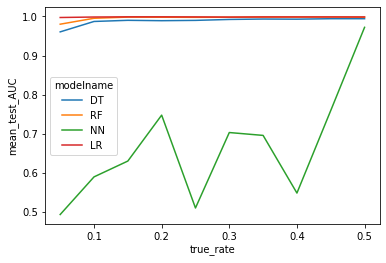

In [3]:
import seaborn as sns 
sns.lineplot('true_rate', 'mean_test_AUC', ci=None, 
             hue='modelname', data=model_dataset)

In [ ]:
model_dataset['false_negative_rate'] = model_dataset['mean_test_recall'].apply(lambda x: 1-x)
# model_dataset['false_positive_rate'] = model_dataset\

In [ ]:
model_dataset['actual_positive'] = model_dataset['true_rate'].apply(lambda x: totalsamples*x)
# model_dataset['actual_positive']
model_dataset['actual_negative'] = model_dataset['true_rate'].apply(lambda x: totalsamples*(1-x))
# model_dataset['actual_negative']
# specificity = (mean_test_accuracy * totalsamples - mean_test_recall * actual_yes)/actual_no
model_dataset['specificity'] = ((model_dataset['mean_test_accuracy'] * totalsamples) - (model_dataset['mean_test_recall'] * model_dataset['actual_positive']))/(model_dataset['actual_negative'])

In [ ]:
model_dataset['false_positive_rate'] = model_dataset['specificity'].apply(lambda x: 1-x)

In [ ]:
#@title
lr_results = dataset.loc[dataset['modelname'] == 'LR']
lr_results

,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1,params,true_rate,modelname,seed
9,NaN,NaN,20,NaN,NaN,20,NaN,NaN,20,NaN,NaN,20,NaN,NaN,20,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.2,LR,0
10,0.938504,0.030445,8,0.90125,0.039394,3,0.806160,0.069249,2,0.65875,0.173952,9,0.716031,0.133143,6,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.2,LR,0
11,NaN,NaN,17,NaN,NaN,18,NaN,NaN,18,NaN,NaN,17,NaN,NaN,18,"{'C': 2.7825594022071245, 'class_weight': None...",0.2,LR,0
12,0.935680,0.030590,10,0.90225,0.034418,2,0.797645,0.075792,3,0.67875,0.114742,2,0.732304,0.096839,2,"{'C': 2.7825594022071245, 'class_weight': None...",0.2,LR,0
13,NaN,NaN,11,NaN,NaN,16,NaN,NaN,16,NaN,NaN,15,NaN,NaN,16,"{'C': 7.742636826811269, 'class_weight': None,...",0.2,LR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.976330,0.017530,1,0.94025,0.031863,1,0.929383,0.036397,1,0.95350,0.025030,1,0.941242,0.030849,1,"{'C': 1291.5496650148827, 'class_weight': None...",0.5,LR,0
315,NaN,NaN,18,NaN,NaN,18,NaN,NaN,18,NaN,NaN,18,NaN,NaN,18,"{'C': 3593.813663804626, 'class_weight': None,...",0.5,LR,0
316,0.967446,0.018612,4,0.92425,0.031020,4,0.910463,0.034234,4,0.94150,0.026106,4,0.925687,0.030129,4,"{'C': 3593.813663804626, 'class_weight': None,...",0.5,LR,0
317,NaN,NaN,12,NaN,NaN,12,NaN,NaN,12,NaN,NaN,12,NaN,NaN,12,"{'C': 10000.0, 'class_weight': None, 'dual': F...",0.5,LR,0


In [ ]:
#@title
# params_lst1 = results_df1['params'].tolist()
# params_lst1[3]
# nn_results = results_df4.loc[results_df4['modelname'] == 'NN']
# best_nn = nn_results.loc[nn_results['mean_test_AUC'] == nn_results['mean_test_AUC'].max()]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(gs_dt.predict(X),y)

array([[3584,    3],
       [  16,  397]])

In [ ]:
#@title
# column = cv_results_df.loc[:, ["params"]]
# print(column)

In [ ]:
#@title
# best_row = cv_results_df[cv_results_df["rank_test_AUC"] == 1]
# print(best_row)

In [ ]:
#@title
# gs_dt.best_estimator_
# row = cv_results_df[cv_results_df['params'] == gs_dt.best_params_]
# row

# Run all model with 100 different seeds

In [ ]:
#@title
from tqdm.notebook import tqdm
scoring = {'AUC': 'roc_auc','accuracy':'accuracy', 'precision': 'precision','recall':'recall','f1':'f1'}
# modelnames = ['DT','RF','LR','NN']
modelnames = 'DT'
# params = [DTparams,RFparams,LRparams,NNparams]
allresults = pd.DataFrame()

# for seed in tqdm(range(100)):
for seed in tqdm(range(2)):
  traindata = getSample(seed, totalsamples, trueRate,dropCols = ['City','Postal Code','AreaCode','ProdMix'])
  X = traindata.drop('Target', axis=1)
  X = pd.get_dummies(X) # onehot encoding categorical cols
  y = traindata['Target'] == 'YES'
  
  # for k,model in enumerate([DT,RF,LR,NN]):
  DTgrid = GridSearchCV(DT, dt_param_grid, scoring=scoring, refit='AUC',n_jobs=-1, cv=5, return_train_score=False)
  DTgrid.fit(X,y)
  cv_results_df = pd.DataFrame(DTgrid.cv_results_)
  # gridresult = pd.json_normalize(grid.cv_results_)
  cv_results_df['modelname'] = modelnames
  cv_results_df['seed'] = seed
  # gridresult = gridresult['columns']
  allresults = allresults.append(cv_results_df)

In [ ]:
#@title
from tqdm.notebook import tqdm
# scoring = {'AUC': 'roc_auc','accuracy':'accuracy', 'precision': 'precision','recall':'recall','f1':'f1'}
# models = [DT, RF]
modelnames = ['DT','RF']
params = [dt_param_grid, rf_param_grid]
allresults = pd.DataFrame()

dt_param_grid = {"min_samples_split": [10, 20, 40], # [5, 25]
                 "max_depth": [2, 6, 8], # [4, 6]
                 "min_samples_leaf": [20, 40, 100], # [5, 25]
                 "max_leaf_nodes": [5, 20, 100] # [10, 25]
                }

rf_param_grid = {"min_samples_split": [10, 20, 40], # [5, 25]
                 "max_depth": [2, 6, 8], # [4, 6]
                 "min_samples_leaf": [20, 40, 100], # [5, 25]
                 "max_leaf_nodes": [5, 20, 100] # [10, 25]
                }    # add number of trees [10]

metric_col = [
                'mean_test_AUC',
                'std_test_AUC',
                'rank_test_AUC',
                'mean_test_accuracy',
                'std_test_accuracy',
                'mean_test_precision',
                'std_test_precision',
                'mean_test_recall',
                'std_test_recall',
                'mean_test_f1',
                'std_test_f1',
                'params'
                ]

In [ ]:
#@title
# for seed in tqdm(range(100)):
for seed in tqdm(range(2)):
  traindata = getSample(seed, 
                        totalsamples, 
                        trueRate,dropCols = ['City',
                                             'Postal Code',
                                             'AreaCode',
                                             'ProdMix'])
  X = traindata.drop('Target', axis=1)
  X = pd.get_dummies(X) # onehot encoding categorical cols
  y = traindata['Target'] == 'YES'
  
  # for k,model in enumerate(models):
  for k,model in enumerate([DT,RF]):
    grid = GridSearchCV(model, 
                        params[k], 
                        scoring=scoring, 
                        refit='AUC',
                        n_jobs=-1, 
                        cv=5, 
                        return_train_score=False)
    grid.fit(X,y)
    cv_results_df = pd.DataFrame(grid.cv_results_)
    cv_results_df = cv_results_df[[*metric_col]]
    cv_results_df['modelname'] = modelnames[k]
    cv_results_df['seed'] = seed
    allresults = allresults.append(cv_results_df)

In [ ]:
#@title
allresults

,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1,params,modelname,seed
0,0.994818,0.002888,37,0.98175,0.002915,1.0,0.0,0.8175,0.029155,0.899306,0.017557,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",DT,0
1,0.994818,0.002888,37,0.98175,0.002915,1.0,0.0,0.8175,0.029155,0.899306,0.017557,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",DT,0
2,0.994818,0.002888,37,0.98175,0.002915,1.0,0.0,0.8175,0.029155,0.899306,0.017557,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",DT,0
3,0.994818,0.002888,37,0.98175,0.002915,1.0,0.0,0.8175,0.029155,0.899306,0.017557,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",DT,0
4,0.994818,0.002888,37,0.98175,0.002915,1.0,0.0,0.8175,0.029155,0.899306,0.017557,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",DT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.985965,0.004710,34,0.90000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,"{'max_depth': 8, 'max_leaf_nodes': 100, 'min_s...",RF,1
77,0.985965,0.004710,34,0.90000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,"{'max_depth': 8, 'max_leaf_nodes': 100, 'min_s...",RF,1
78,0.989012,0.005837,7,0.90000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,"{'max_depth': 8, 'max_leaf_nodes': 100, 'min_s...",RF,1
79,0.989012,0.005837,7,0.90000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,"{'max_depth': 8, 'max_leaf_nodes': 100, 'min_s...",RF,1


In [ ]:
#@title
best_row = cv_results_df[cv_results_df["rank_test_AUC"] == 1]
best_row

,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1,params,modelname,seed
33,0.989156,0.005879,1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'max_depth': 6, 'max_leaf_nodes': 5, 'min_sam...",RF,1
34,0.989156,0.005879,1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'max_depth': 6, 'max_leaf_nodes': 5, 'min_sam...",RF,1
35,0.989156,0.005879,1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'max_depth': 6, 'max_leaf_nodes': 5, 'min_sam...",RF,1
60,0.989156,0.005879,1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'max_depth': 8, 'max_leaf_nodes': 5, 'min_sam...",RF,1
61,0.989156,0.005879,1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'max_depth': 8, 'max_leaf_nodes': 5, 'min_sam...",RF,1
62,0.989156,0.005879,1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'max_depth': 8, 'max_leaf_nodes': 5, 'min_sam...",RF,1


In [ ]:
#@title
row = cv_results_df[cv_results_df['params'] == grid.best_params_]
row

,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1,params,modelname,seed
33,0.989156,0.005879,1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'max_depth': 6, 'max_leaf_nodes': 5, 'min_sam...",RF,1


In [ ]:
#@title
from sklearn.metrics import confusion_matrix
confusion_matrix(grid.predict(X),y)

array([[3600,  400],
       [   0,    0]])

In [ ]:
#@title
confusion_matrix(y, grid.predict(X))

array([[3600,    0],
       [ 400,    0]])

In [ ]:
#@title
allresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,modelname,seed
0,0.188362,0.020484,0.029125,0.004629,2,5,20,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.996276,0.996016,0.995278,0.989193,0.997326,0.994818,0.002888,37,0.98375,0.97875,0.97875,0.98125,0.98625,0.98175,0.002915,37,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,0.8375,0.7875,0.7875,0.8125,0.8625,0.8175,0.029155,37,0.911565,0.881119,0.881119,0.896552,0.926174,0.899306,0.017557,37,DT,0
1,0.178182,0.008684,0.027428,0.001164,2,5,20,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.996276,0.996016,0.995278,0.989193,0.997326,0.994818,0.002888,37,0.98375,0.97875,0.97875,0.98125,0.98625,0.98175,0.002915,37,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,0.8375,0.7875,0.7875,0.8125,0.8625,0.8175,0.029155,37,0.911565,0.881119,0.881119,0.896552,0.926174,0.899306,0.017557,37,DT,0
2,0.205382,0.009373,0.032475,0.001631,2,5,20,40,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.996276,0.996016,0.995278,0.989193,0.997326,0.994818,0.002888,37,0.98375,0.97875,0.97875,0.98125,0.98625,0.98175,0.002915,37,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,0.8375,0.7875,0.7875,0.8125,0.8625,0.8175,0.029155,37,0.911565,0.881119,0.881119,0.896552,0.926174,0.899306,0.017557,37,DT,0
3,0.189717,0.010836,0.030912,0.003495,2,5,40,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.996276,0.996016,0.995278,0.989193,0.997326,0.994818,0.002888,37,0.98375,0.97875,0.97875,0.98125,0.98625,0.98175,0.002915,37,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,0.8375,0.7875,0.7875,0.8125,0.8625,0.8175,0.029155,37,0.911565,0.881119,0.881119,0.896552,0.926174,0.899306,0.017557,37,DT,0
4,0.166128,0.003558,0.030027,0.006537,2,5,40,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.996276,0.996016,0.995278,0.989193,0.997326,0.994818,0.002888,37,0.98375,0.97875,0.97875,0.98125,0.98625,0.98175,0.002915,37,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,0.8375,0.7875,0.7875,0.8125,0.8625,0.8175,0.029155,37,0.911565,0.881119,0.881119,0.896552,0.926174,0.899306,0.017557,37,DT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.181691,0.010727,0.026929,0.001074,8,100,40,20,"{'max_depth': 8, 'max_leaf_nodes': 100, 'min_s...",0.998194,0.999436,0.999418,0.999557,0.999297,0.999181,0.000500,19,0.98375,0.99375,0.99000,0.99125,0.98875,0.98950,0.003317,13,0.860215,0.941176,0.909091,0.962025,0.898876,0.914277,0.035186,64,1.0000,1.0000,1.0000,0.9500,1.0000,0.9900,0.020000,1,0.924855,0.969697,0.952381,0.955975,0.946746,0.949931,0.014643,13,DT,1
77,0.176247,0.004036,0.027663,0.001672,8,100,40,40,"{'max_depth': 8, 'max_leaf_nodes': 100, 'min_s...",0.998194,0.999436,0.999418,0.999557,0.999297,0.999181,0.000500,19,0.98375,0.99375,0.99000,0.99125,0.98875,0.98950,0.003317,13,0.860215,0.941176,0.909091,0.962025,0.898876,0.914277,0.035186,64,1.0000,1.0000,1.0000,0.9500,1.0000,0.9900,0.020000,1,0.924855,0.969697,0.952381,0.955975,0.946746,0.949931,0.014643,13,DT,1


In [ ]:
#@title
best_record = allresults[allresults['params'] == DTgrid.best_params_]
best_record 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,modelname,seed
36,0.202553,0.015099,0.026447,0.001292,6,20,20,10,"{'max_depth': 6, 'max_leaf_nodes': 20, 'min_sa...",0.999262,0.999071,0.999149,0.986502,0.998993,0.996595,0.005048,1,0.99125,0.99000,0.9925,0.98625,0.98625,0.98925,0.002574,1,0.950617,0.939024,0.951220,0.915663,0.905882,0.932481,0.018511,46,0.9625,0.9625,0.9750,0.9500,0.9625,0.9625,0.007906,25,0.956522,0.950617,0.962963,0.932515,0.933333,0.947190,0.012288,1,DT,0
36,0.216252,0.015304,0.031857,0.002330,6,20,20,10,"{'max_depth': 6, 'max_leaf_nodes': 20, 'min_sa...",0.998021,0.999601,0.999714,0.999844,0.999453,0.999326,0.000665,1,0.98125,0.98875,0.9925,0.99500,0.99250,0.99000,0.004809,1,0.891566,0.986301,0.940476,0.963415,0.962500,0.948852,0.032102,52,0.9250,0.9000,0.9875,0.9875,0.9625,0.9525,0.034821,19,0.907975,0.941176,0.963415,0.975309,0.962500,0.950075,0.023751,1,DT,1


In [ ]:
#@title
newcols = ['seed','modelname'] + [col for col in results.columns if col not in ['seed','modelname']]
results = results[newcols]
# results.to_csv('modelperformances.csv', index=0)

In [ ]:
#@title
results_copy = results.copy()
results_copy[[*metric_col]] = results_copy[[*metric_col]].apply(lambda x: x.astype(str))
results_copy[[*metric_col]] = results_copy[[*metric_col]].apply(lambda x: x.str.strip('[]').astype(float))

,seed,modelname,mean_test_AUC,std_test_AUC,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1
0,0,DT,0.991632,0.007465,0.99350,0.002000,0.959018,0.022097,0.9775,0.012247,0.967921,0.009415
0,0,RF,0.999512,0.000226,0.98700,0.003122,0.994399,0.006867,0.8750,0.031623,0.930558,0.017688
0,0,LR,0.926118,0.015507,0.93375,0.010548,0.776206,0.074817,0.4700,0.073144,0.584649,0.076904
0,0,NN,0.353500,0.027154,0.16175,0.017403,0.080935,0.005386,0.7125,0.043301,0.145355,0.009572
0,1,DT,0.982497,0.014569,0.99100,0.003984,0.953725,0.044958,0.9600,0.034821,0.955475,0.018627
0,1,RF,0.999561,0.000131,0.99125,0.003354,0.997436,0.005128,0.9150,0.036572,0.953992,0.018421
0,1,LR,0.930722,0.014811,0.93275,0.008456,0.766928,0.068654,0.4725,0.064904,0.582696,0.059304
0,1,NN,0.418969,0.026470,0.90075,0.000612,0.600000,0.489898,0.0075,0.006124,0.014815,0.012096
0,2,DT,0.987361,0.007922,0.99650,0.001837,0.997468,0.005063,0.9675,0.018708,0.982148,0.009409
0,2,RF,0.999774,0.000146,0.99300,0.001871,1.000000,0.000000,0.9300,0.018708,0.963634,0.009976


In [ ]:
#@title
results_copy.groupby('modelname')[[*metric_col]].mean()

,mean_test_AUC,std_test_AUC,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1
modelname,,,,,,,,,,
DT,0.988802,0.008961,0.99275,0.003023,0.961421,0.026197,0.9680,0.022781,0.964048,0.014685
LR,0.928325,0.019697,0.93515,0.007703,0.791597,0.055588,0.4770,0.058125,0.594005,0.056034
NN,0.561020,0.028331,0.59480,0.004263,0.356187,0.099057,0.3670,0.016480,0.109348,0.014666
RF,0.999424,0.000373,0.98930,0.003057,0.997232,0.003789,0.8955,0.030709,0.943177,0.016992


In [ ]:
#@title
from google.colab import files
files.download('modelperformances.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>